In [30]:
import os
import config
from data_processing import CompleteModelsDataProcessor
import matplotlib.pyplot as plt
%matplotlib inline
from utils import get_image_paths, select_random_images

In [3]:
data_processor = CompleteModelsDataProcessor(config)

In [17]:
training_images = get_image_paths(config.TRAINING_DATA_DIR, config.small_length)
# 10 images, to choose from
files, _ = select_random_images(training_images, 10, [])
images, labels = data_processor.get_data_from_paths(files)

In [34]:
def remove_axes_text_and_ticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

def save_fig(fig, filename):
    for fmt in ["pdf", "png"]:
        fig.savefig(os.path.join("plots", f"{filename}.{fmt}"), bbox_inches='tight', pad_inches=0, format=fmt)

# Voronoi cells

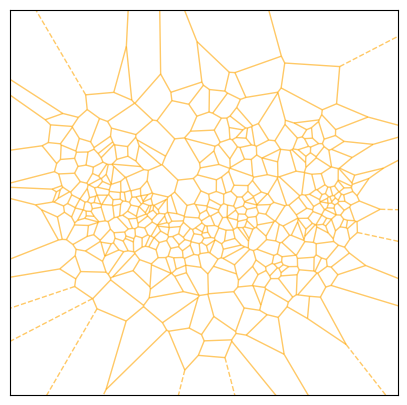

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_processor.voronoi_cells._plot_voronoi_cells(ax)
remove_axes_text_and_ticks(ax)
plt.show()
save_fig(fig, "voronoi_cells")
plt.close(fig)

# Voronoi cells with neurons

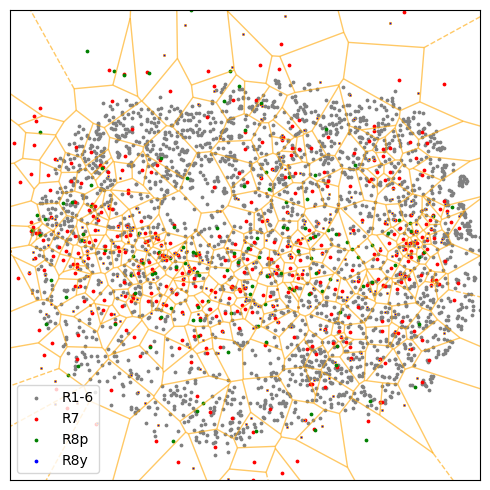

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_processor.voronoi_cells.plot_voronoi_cells_with_neurons(data_processor.tesselated_neurons, ax)
plt.show()
save_fig(fig, "voronoi_cells_with_neurons")
plt.close(fig)

# Plot image

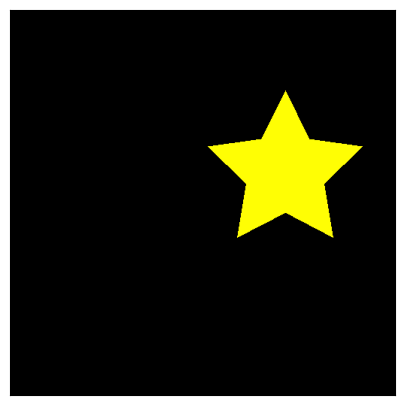

In [41]:
pixel_num = data_processor.voronoi_cells.pixel_num
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(images[0], extent=[0, pixel_num, 0, pixel_num])
remove_axes_text_and_ticks(ax)
plt.show()
save_fig(fig, "input_image")
plt.close(fig)

# Plot image with Voronoi cells

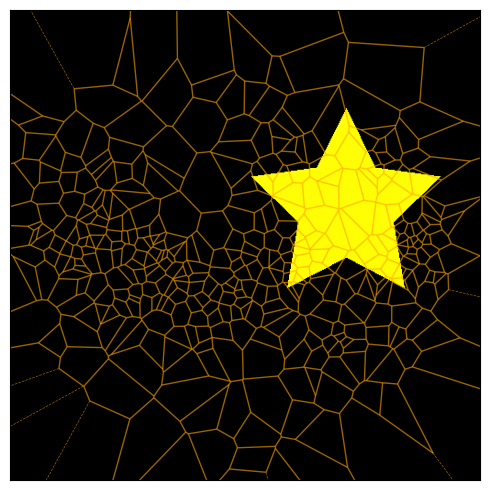

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_processor.voronoi_cells.plot_voronoi_cells_with_image(images[0], ax)
plt.show()
save_fig(fig, "input_image_with_voronoi_cells")
plt.close(fig)

# Activations

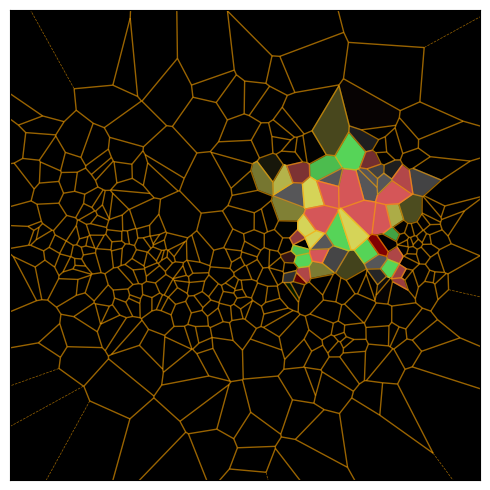

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
data_processor.plot_neuron_activations(images[0], ax)
plt.show()
save_fig(fig, "activations")
plt.close(fig)